<a href="https://colab.research.google.com/github/karthikkoding/pytorch_for_DL_ML/blob/main/02_pytorch_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network with PyTorch

Classification is a problem of predicting whether it is something or the other

##1. Make classification Data and get it ready

In [1]:
import sklearn


In [2]:
from sklearn.datasets import make_circles

#Make 1000 examples

n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)



In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f"First 5 examples of X:\n {X[:5]}")
print(f"First 5 examples of y:\n {y[:5]}")

First 5 examples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 examples of y:
 [1 1 1 1 0]


In [5]:
#Make DataFrames of circle data

import pandas as pd

circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})

In [6]:
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


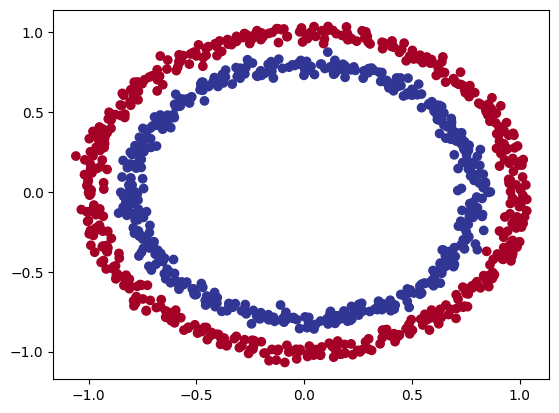

In [7]:
#Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

##Check input and output shapes

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
X_sample =X[0]
y_sample=y[0]

X_sample,y_sample

(array([0.75424625, 0.23148074]), 1)

In [10]:
import torch
from torch import nn

torch.__version__

'2.2.1+cu121'

In [11]:
X.dtype,type(X)

(dtype('float64'), numpy.ndarray)

In [12]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [13]:
X.dtype,type(X),y.dtype,type(y)

(torch.float32, torch.Tensor, torch.float32, torch.Tensor)

In [14]:
RANDOM_SEED=42
torch.manual_seed(RANDOM_SEED)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

In [16]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

##Building a model

lets build a model to classify red and blue dots

Steps :
1. device agonistic code
2. construct the model by subclassing nn.Module
3. Define loss and optimiser functions
4. Create a training and testing loop

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
X_train.shape

torch.Size([800, 2])

##Construct the model

In [19]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)

  def forward(x:torch.Tensor)->torch.Tensor:
    return self.layer_2(self.layer_1(x)) # x-> layer_1 ->layer_2 -> output


In [20]:
#instantate the model and send it to device

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
#Lets replicate the above model using nn.Sequential


model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
    ).to(device)


model_0



Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.two_linear_layers=nn.Sequential(
        nn.Linear(in_features=3,out_features=5),
        nn.Linear(in_features=5,out_features=1)
        ).to(device)

  def forward(x:torch.Tensor)->torch.Tensor:
    return two_linear_layers(x)

In [24]:

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=3, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [25]:
model_0.state_dict(),model_1.state_dict()

(OrderedDict([('0.weight',
               tensor([[-0.0829, -0.2872],
                       [ 0.4691, -0.5582],
                       [-0.3260, -0.1997],
                       [-0.4252,  0.0667],
                       [-0.6984,  0.6386]], device='cuda:0')),
              ('0.bias',
               tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
              ('1.weight',
               tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
              ('1.bias', tensor([-0.1213], device='cuda:0'))]),
 OrderedDict([('two_linear_layers.0.weight',
               tensor([[ 0.2430,  0.5155,  0.3337],
                       [-0.2524,  0.3333,  0.1033],
                       [ 0.2932, -0.3519, -0.5715],
                       [-0.2231, -0.4428,  0.4737],
                       [ 0.1663,  0.2391,  0.1826]], device='cuda:0')),
              ('two_linear_layers.0.bias',
               tensor([-0.0100,  0.4518, -0.4102,  0.0364, -0.3941], device=

In [26]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.0829, -0.2872],
         [ 0.4691, -0.5582],
         [-0.3260, -0.1997],
         [-0.4252,  0.0667],
         [-0.6984,  0.6386]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([-0.1213], device='cuda:0', requires_grad=True)]

In [27]:
#Make predictions

untrained_preds = model_0(X_test.to(device))

untrained_preds.shape,X_test.shape,y_test.shape




(torch.Size([200, 1]), torch.Size([200, 2]), torch.Size([200]))

In [28]:
X_test[:10],y[:10],untrained_preds[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]),
 tensor([[-0.0338],
         [-0.0309],
         [ 0.0894],
         [-0.0692],
         [ 0.2967],
         [ 0.2968],
         [ 0.1405],
         [ 0.2178],
         [ 0.0805],
         [-0.0284]], device='cuda:0', grad_fn=<SliceBackward0>))

##Setup a loss function and optimiser

Which loss function or optimiser we should use?

1. Regression -> MAE, MSE
2. Classification -> Binary cross entrophy or Categorical cross entropy

as a reminder loss measures how wrong our predictions are


What is a logit?

logit layer is nothing but the layer that feeds into the softmax. The output of the softmax are the probabilities for classification task

or simply put just the layer before softmax or raw final layer

In [29]:
#Setup the loass function

loss_fn = nn.BCEWithLogitsLoss() #This has sigmoid activation built in

optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [30]:
loss_fn

BCEWithLogitsLoss()

In [31]:
#calculate accuracy (evaluation matrix for classification program)
# Accuracy = True Positive/(True Positive + True Negative) * 100

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## Training the Model

### Going from raw logits -> prediction probablities -> prediction labels

Our model outputs are going to be  raw **logits**.

We can convert these logits into prediction probablities using some kind of activation fucntion (e.g. sigmoid for binary classification and softmax for multiclass)

and at last finally we can convert prediction probablities into prediction labels by using argmax or by round them.

usually `rounding()` for binary
`argmax()` for multiclass (softmax)

In [32]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [33]:
# view the first five outputs of forward pass for the test data

y_logits = model_0((X_test).to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0', grad_fn=<SliceBackward0>)

In [34]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [35]:
#we use sigmoid activation function on logits

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0', grad_fn=<SigmoidBackward0>)

for our prediction probability values we need  to perform a range style round on them

* `y_pred_probs` > 0.5 then y=1 (class 1)
* `y_pred_probs` < 0.5 then y=0 (class 0)

In [36]:
#now we round them

torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [37]:
y_preds= torch.round(y_pred_probs)
y_preds

y_pred_labels = torch.round(torch.sigmoid(model_0((X_test).to(device))))
y_pred_labels[:5].shape,y_preds.shape

(torch.Size([5, 1]), torch.Size([5, 1]))

In [38]:
#check for equality

torch.eq(y_preds.squeeze(),y_test[:5].to(device))

tensor([False,  True,  True,  True,  True], device='cuda:0')

In [39]:
y_test.shape

torch.Size([200])

In [40]:
###Training and Test loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs =100

#put the data on target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  ### training
  model_0.train()

  #1.forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate the loss
  loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expects logits as input
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #set the optimiser to zero grad

  optimiser.zero_grad()

  #loss backward

  loss.backward()

  #optimiser step

  optimiser.step()


  ###Testing

  model_0.eval()

  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

  #calculate the loss

  test_loss = loss_fn(test_logits, #nn.BCEWithLogitsLoss expects logits as input
                 y_test)

  test_accuracy =  accuracy_fn(y_true=y_test,
                    y_pred=test_pred)

#print what is happening

  if epoch%10 == 0 :
    print(f"Epoch : {epoch} | Loss : {loss:.5f} , Acc : {acc:.2f}% | Test Loss : {test_loss:.5f} , Test Acc : {test_accuracy:.2f}%")





Epoch : 0 | Loss : 0.69796 , Acc : 51.88% | Test Loss : 0.69440 , Test Acc : 58.00%
Epoch : 10 | Loss : 0.69590 , Acc : 51.25% | Test Loss : 0.69305 , Test Acc : 53.00%
Epoch : 20 | Loss : 0.69490 , Acc : 51.62% | Test Loss : 0.69254 , Test Acc : 49.50%
Epoch : 30 | Loss : 0.69435 , Acc : 51.12% | Test Loss : 0.69236 , Test Acc : 49.50%
Epoch : 40 | Loss : 0.69401 , Acc : 50.88% | Test Loss : 0.69232 , Test Acc : 51.00%
Epoch : 50 | Loss : 0.69378 , Acc : 50.25% | Test Loss : 0.69234 , Test Acc : 50.00%
Epoch : 60 | Loss : 0.69362 , Acc : 50.00% | Test Loss : 0.69239 , Test Acc : 51.50%
Epoch : 70 | Loss : 0.69351 , Acc : 50.25% | Test Loss : 0.69246 , Test Acc : 51.00%
Epoch : 80 | Loss : 0.69342 , Acc : 49.88% | Test Loss : 0.69254 , Test Acc : 50.00%
Epoch : 90 | Loss : 0.69336 , Acc : 49.88% | Test Loss : 0.69262 , Test Acc : 53.00%


## lets make some prediction our model

from the metrics it looks like our model is not learning anything

lets visualise

In [41]:
import requests
from pathlib import Path

#Download helper functions from learn Pytorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")

else:
  print("Download helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary



Download helper_functions.py


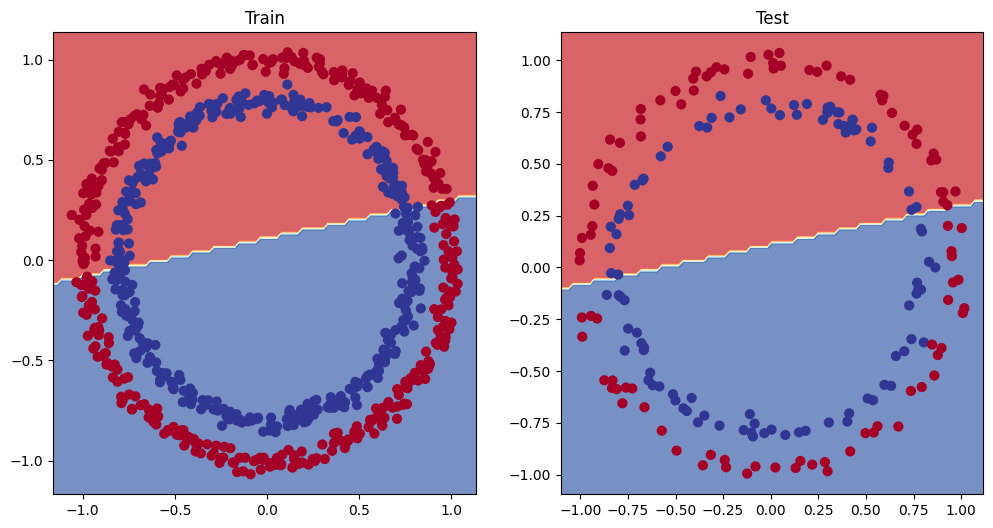

In [42]:
#Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

##Improving the model (from model/solution perspective)

General methods
* Add more layers : give the model more chances to learn about the patterns in the data
* Add more hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss functions

All these directly deal with the model , rather than the data
they are often referred as **Hyper Parameters**
usually edited by data scientists or ML engineers



Upgrading everything
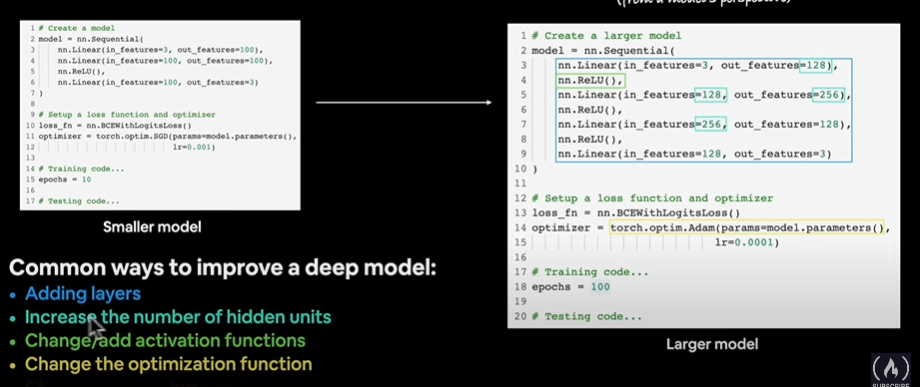

In [43]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z

In [44]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
loss_fn = nn.BCEWithLogitsLoss() #This has sigmoid activation built in

optimiser = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [46]:
###Training and Test loop for new loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs =1000 #epochs are increased from 100 -> 1000

#put the data on target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  ### training
  model_1.train()

  #1.forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate the loss
  loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expects logits as input
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #set the optimiser to zero grad

  optimiser.zero_grad()

  #loss backward

  loss.backward()

  #optimiser step

  optimiser.step()


  ###Testing

  model_1.eval()

  with torch.inference_mode():
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

  #calculate the loss

  test_loss = loss_fn(test_logits, #nn.BCEWithLogitsLoss expects logits as input
                 y_test)

  test_accuracy =  accuracy_fn(y_true=y_test,
                    y_pred=test_pred)

#print what is happening

  if epoch%10 == 0 :
    print(f"Epoch : {epoch} | Loss : {loss:.5f} , Acc : {acc:.2f}% | Test Loss : {test_loss:.5f} , Test Acc : {test_accuracy:.2f}%")





Epoch : 0 | Loss : 0.69396 , Acc : 50.88% | Test Loss : 0.69261 , Test Acc : 51.00%
Epoch : 10 | Loss : 0.69369 , Acc : 50.25% | Test Loss : 0.69270 , Test Acc : 50.00%
Epoch : 20 | Loss : 0.69351 , Acc : 50.12% | Test Loss : 0.69283 , Test Acc : 49.50%
Epoch : 30 | Loss : 0.69339 , Acc : 50.50% | Test Loss : 0.69297 , Test Acc : 48.00%
Epoch : 40 | Loss : 0.69329 , Acc : 50.38% | Test Loss : 0.69310 , Test Acc : 49.00%
Epoch : 50 | Loss : 0.69322 , Acc : 49.88% | Test Loss : 0.69324 , Test Acc : 50.00%
Epoch : 60 | Loss : 0.69317 , Acc : 49.38% | Test Loss : 0.69336 , Test Acc : 51.50%
Epoch : 70 | Loss : 0.69312 , Acc : 49.38% | Test Loss : 0.69348 , Test Acc : 50.50%
Epoch : 80 | Loss : 0.69309 , Acc : 50.12% | Test Loss : 0.69359 , Test Acc : 50.00%
Epoch : 90 | Loss : 0.69307 , Acc : 50.50% | Test Loss : 0.69370 , Test Acc : 48.50%
Epoch : 100 | Loss : 0.69305 , Acc : 50.38% | Test Loss : 0.69379 , Test Acc : 48.00%
Epoch : 110 | Loss : 0.69303 , Acc : 50.88% | Test Loss : 0.69388

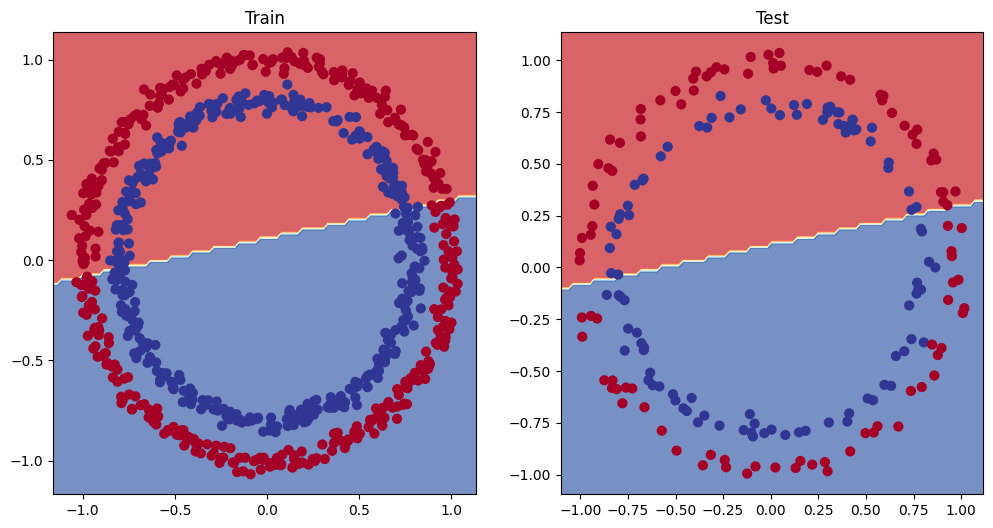

In [47]:
#Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

### Prepare data to see if our data can fit a straight line

one way troubleshoot a larger problem is to test out a smaller problem.

In [48]:
#lets make some data


the missing of our model is non linearity, the data is non linear we cant fit a straight line

##Non Linearity

In [49]:
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

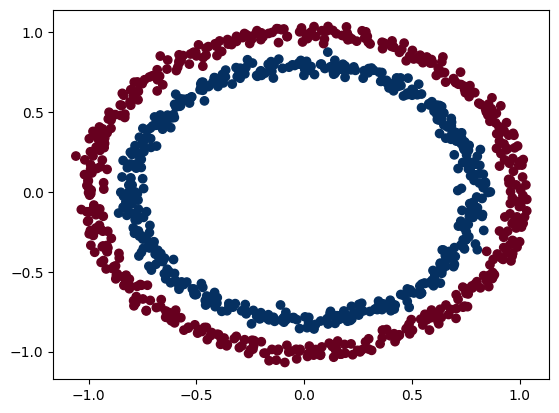

In [51]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdBu);

In [52]:
# convert to tensor

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

In [61]:
# Build a model with non linearity

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.Sigmoid()

  def forward(self, x):
    #where should we put non linear activation functions
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [62]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): Sigmoid()
)

In [65]:
loss_fn = nn.BCEWithLogitsLoss() #This has sigmoid activation built in

optimiser = torch.optim.SGD(params=model_3.parameters(),
                            lr=1)

In [66]:
###Training and Test loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs =10000

#put the data on target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  ### training
  model_3.train()

  #1.forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate the loss
  loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expects logits as input
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #set the optimiser to zero grad

  optimiser.zero_grad()

  #loss backward

  loss.backward()

  #optimiser step

  optimiser.step()


  ###Testing

  model_3.eval()

  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

  #calculate the loss

  test_loss = loss_fn(test_logits, #nn.BCEWithLogitsLoss expects logits as input
                 y_test)

  test_accuracy =  accuracy_fn(y_true=y_test,
                    y_pred=test_pred)

#print what is happening

  if epoch%1000 == 0 :
    print(f"Epoch : {epoch} | Loss : {loss:.5f} , Acc : {acc:.2f}% | Test Loss : {test_loss:.5f} , Test Acc : {test_accuracy:.2f}%")





Epoch : 0 | Loss : 0.69302 , Acc : 50.88% | Test Loss : 0.69345 , Test Acc : 48.50%
Epoch : 1000 | Loss : 0.69274 , Acc : 51.62% | Test Loss : 0.69389 , Test Acc : 46.50%
Epoch : 2000 | Loss : 0.69115 , Acc : 52.62% | Test Loss : 0.69351 , Test Acc : 47.00%
Epoch : 3000 | Loss : 0.65614 , Acc : 57.00% | Test Loss : 0.65469 , Test Acc : 61.00%
Epoch : 4000 | Loss : 0.42633 , Acc : 72.12% | Test Loss : 0.51330 , Test Acc : 69.50%
Epoch : 5000 | Loss : 0.05081 , Acc : 99.75% | Test Loss : 0.09053 , Test Acc : 98.00%
Epoch : 6000 | Loss : 0.01780 , Acc : 100.00% | Test Loss : 0.03999 , Test Acc : 100.00%
Epoch : 7000 | Loss : 0.00958 , Acc : 100.00% | Test Loss : 0.02540 , Test Acc : 100.00%
Epoch : 8000 | Loss : 0.00656 , Acc : 100.00% | Test Loss : 0.01928 , Test Acc : 100.00%
Epoch : 9000 | Loss : 0.00498 , Acc : 100.00% | Test Loss : 0.01580 , Test Acc : 100.00%


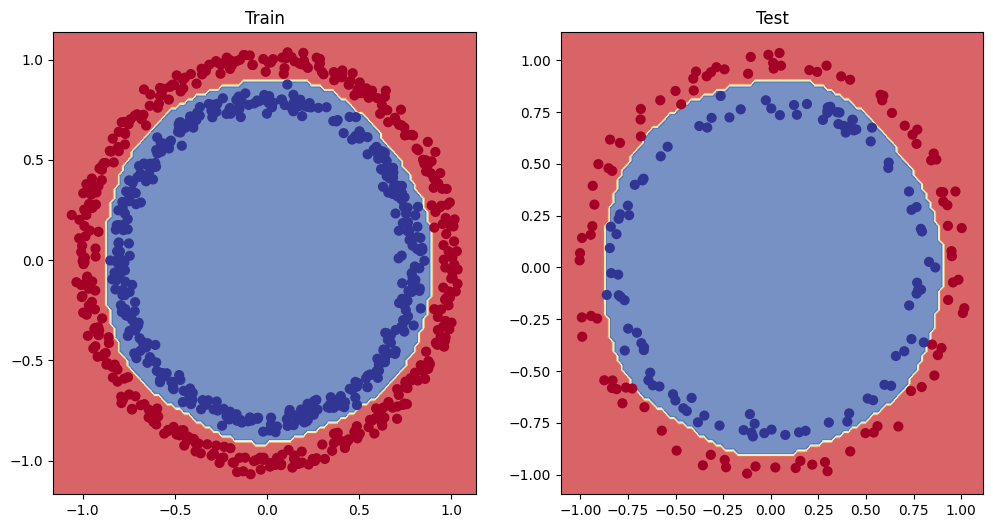

In [67]:
#Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)